[Reference](https://medium.com/analytics-vidhya/python-code-on-arima-forecasting-d6e2fd90697c)

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 <a list of 36 Text major ticklabel objects>)

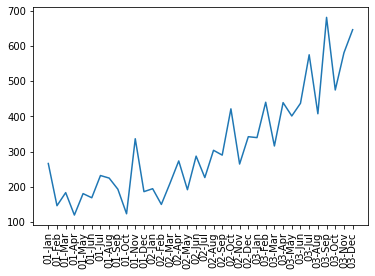

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/shampoo_dataset.csv')
plt.plot(df.Month, df.Sales)
plt.xticks(rotation=90)

In [4]:
result = adfuller(df.Sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.060142
p-value: 1.000000


# Finding Difference Order


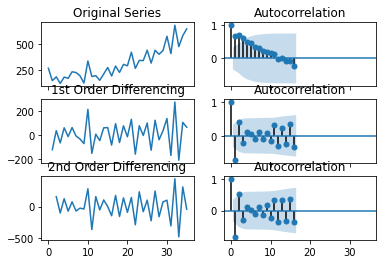

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Sales); axes[0, 0].set_title('Original Series')
plot_acf(df.Sales, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(df.Sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Sales.diff().dropna(), ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(df.Sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Sales.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

# Finding AR Term


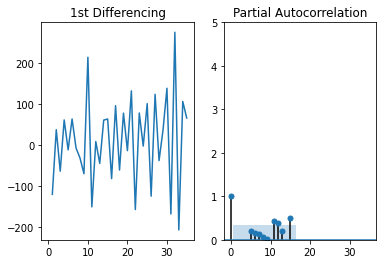

In [6]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Sales.diff().dropna(), ax=axes[1])
plt.show()

# Finding MA Term


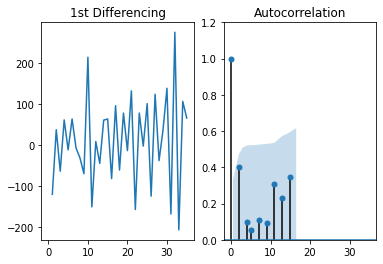

In [7]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Sales.diff().dropna(), ax=axes[1])

plt.show()

# Model Building


In [8]:
from statsmodels.tsa.arima_model import ARIMA
# ARIMA order (p,d,q)
model = ARIMA(df.Sales, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -195.762
Method:                       css-mle   S.D. of innovations             59.410
Date:                Sun, 06 Mar 2022   AIC                            401.525
Time:                        08:03:08   BIC                            409.302
Sample:                             1   HQIC                           404.209
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.2823      6.239      1.648      0.109      -1.945      22.510
ar.L1.D.Sales     0.1019      0.207      0.492      0.626      -0.304       0.508
ma.L1.D.Sales    -1.4369      0.477     

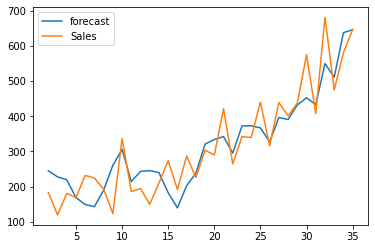

In [9]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [11]:
import numpy as np
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit(disp=-1)
# Forecast
fc, se, conf = fitted.forecast(6, alpha=0.05)
mape = np.mean(np.abs(fc - test)/np.abs(test))  # MAPE